<h1><strong>Support Vector Machine </strong></h1>
<br> Importo los modulos necesarios

In [15]:
import pandas as pd
import numpy as np
import nbimporter # pip install nbimporter

import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

from feature_builder import process_dataset
from Exporter import export_model_csv, export_skf_model_csv
from hyperparameter_tunning import obtener_hiperparametros

hyper_params = obtener_hiperparametros()

<h3>Cargo los datos necesarios

In [5]:
train_dataset = pd.read_csv('train.csv')

In [6]:
test_dataset = pd.read_csv('test.csv')

In [7]:
y = train_dataset.loc[:,'target']

In [8]:
params = obtener_hiperparametros()

<h2><strong>Declaro las distintas combinaciones de features

TF-IDF

In [19]:
x_tfidf = process_dataset(train_dataset, text_type='tfidf')


In [20]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y, test_size = .30, random_state = 17)

Embeddings, Spacy y features manuales

In [9]:
x_processed = process_dataset(train_dataset, use_spacy=True)

Percentage of words covered in the embeddings = 0.4937444933920705
Percentage of words covered in the embeddings = 0.5961027457927369


In [10]:
x_train_processed, x_test_processed, y_train_processed, y_test_processed = train_test_split(x_processed, y, test_size = .33, random_state = 17)

Embeddings y spacy

In [9]:
x_embedd = process_dataset(train_dataset, use_spacy=True, use_manual_features=False)

Embeddings loaded!
Percentage of words covered in the embeddings = 0.4937444933920705
Embeddings loaded!
Percentage of words covered in the embeddings = 0.5961027457927369


In [10]:
x_train_embedd, x_test_embedd, y_train_embedd, y_test_embedd = train_test_split(x_embedd, y, test_size = .30, random_state = 17)

<h2><strong>Ahora pruebo los algoritmos

<h3>Primero pruebo con tf-idf

<h4 style="color:red">falta ponerle los hiperparametros

In [8]:
SVC_tfidf = svm.SVC(**params)

In [ ]:
SVC_tfidf.fit(x_train_tfidf, y_train_tfidf)

In [ ]:
y_pred_tfidf = SVC_tfidf.predict(x_test_tfidf)
f1_score(y_test_tfidf, y_pred_tfidf)

0.7466802860061288

<h3>Embeddings, spacy y manuales

<h4 style="color:red">falta ponerle los hiperparametros

In [8]:
SVC_proccessed = svm.SVC(**params)

In [15]:
SVC_proccessed.fit(x_train_processed, y_train_processed)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
y_pred_processed = SVC_proccessed.predict(x_test_processed)
f1_score(y_test_processed, y_pred_processed)

0.563751831949194

0.5270758122743683

<h3>Embeddings y spacy

<h4 style="color:red">falta ponerle los hiperparametros

In [10]:
SVC_embedd = svm.SVC**params)

In [11]:
SVC_embedd.fit(x_train_embedd, y_train_embedd)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=5,
    decision_function_shape='ovr', degree=9, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
y_pred_embedd = SVC_embedd.predict(x_test_embedd)
f1_score(y_test_embedd, y_pred_embedd)

0.7757510729613735

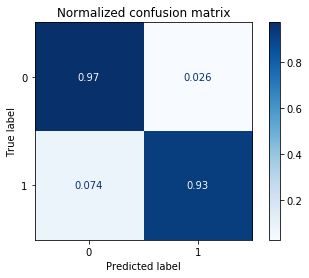

In [41]:
disp = plot_confusion_matrix(SC_LSC, x_test_processed, y_test_processed,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Normalized confusion matrix')
plt.show()

<h3>Voy a hacer una prueba con SKF

In [11]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=None)
f1_scores =[]
SVC_skf_models = []
i=1
for train_index,test_index in kf.split(x_embedd,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = x_embedd.loc[train_index],x_embedd.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    SVC_skf = svm.SVC(kernel='rbf', gamma='scale', degree=9, coef0=5, C=2, probability=True)
    SVC_skf.fit(xtr,ytr)
    f1 = f1_score(yvl, SVC_skf.predict(xvl), average=None)
    score = (f1[0] + f1[1]) / 2
    print('F1_score:',score)
    f1_scores.append(score) 
    modelos.append(SVC_skf)
    i+=1

1 of KFold 5
F1_score: 0.8294515933678058
2 of KFold 5
F1_score: 0.8061279045305383
3 of KFold 5
F1_score: 0.8146379530062
4 of KFold 5
F1_score: 0.8071122949551677
5 of KFold 5
F1_score: 0.8208027753810757


In [12]:
x_test_final = process_dataset(test_dataset, use_spacy=True, use_manual_features=False)

Embeddings loaded!
Percentage of words covered in the embeddings = 0.5707598689343111
Embeddings loaded!
Percentage of words covered in the embeddings = 0.665389037945573


In [ ]:
export_skf_model_csv(SVC_skf_models, x_test_final, test_dataset, 'export_name')

<h2>Paso a exportar el mejor resultado

In [13]:
x_train_final = process_dataset(train_dataset, use_spacy=True, use_manual_features=False)

Embeddings loaded!
Percentage of words covered in the embeddings = 0.4937444933920705
Embeddings loaded!
Percentage of words covered in the embeddings = 0.5961027457927369


In [14]:
x_test_final = process_dataset(test_dataset, use_spacy=True, use_manual_features=False)

Embeddings loaded!
Percentage of words covered in the embeddings = 0.5707598689343111
Embeddings loaded!
Percentage of words covered in the embeddings = 0.665389037945573


In [15]:
export_model_csv(SVC_embedd, x_train_final, x_test_final, test_dataset, y, 'SVC-spacy-no-feat')